# INF442 Project: Power Consumption Weather
<span style="color:green">Students: </span> *Huu Nguyen Hoang, Gabriel Pereira de Carvalho*

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
- [Python setup](#setup)
- [Task 1: Data preprocessing](#1)
    - [Creating two principal dataframes](#1.1)
    - [Treating missing data](#1.2)
        - [Visualising the missing data](#1.2.1)
        - [Interpolating missing data](#1.2.2)
        - [Winsorizing outliers](#1.2.3)
    - [Merging the two dataframes](#1.3)

<h2 align="center"> <font color='gray'>Python setup</font></h2> <a class="anchor" id="setup"></a>

In [1]:
!pip install -q numpy pandas missingno datetime seaborn matplotlib scipy

import numpy as np
import pandas as pd
import missingno as msno
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

<h2 align="center"> <font color='gray'>Task 1: Data preprocessing</font></h2> <a class="anchor" id="1"></a>

<h3 align="center"> <font color='gray'>Creating two principal dataframes</font></h3> <a class="anchor" id="1.1"></a>

Our data folder has four *csv* files with data relative to the household. To facilitate our analysis, we will convert the *csv* files containing data from the household into a single dataframe.

In [2]:
df_2007 = pd.read_csv('p1-power-weather/household_power_consumption/household_power_consumption_2007.csv',  sep=';')
df_2007.columns =['Date', 'Time', 'global_active_power', 'global_reactive_power','voltage','global_intensity','sub_metering_1','sub_metering_2','sub_metering_3']

df_2008 = pd.read_csv('p1-power-weather/household_power_consumption/household_power_consumption_2008.csv',  sep=';')
df_2008.columns =['Date', 'Time', 'global_active_power', 'global_reactive_power','voltage','global_intensity','sub_metering_1','sub_metering_2','sub_metering_3']

df_2009 = pd.read_csv('p1-power-weather/household_power_consumption/household_power_consumption_2009.csv',  sep=';')
df_2009.columns =['Date', 'Time', 'global_active_power', 'global_reactive_power','voltage','global_intensity','sub_metering_1','sub_metering_2','sub_metering_3']

df_2010 = pd.read_csv('p1-power-weather/household_power_consumption/household_power_consumption_2010.csv',  sep=';')
df_2010.columns =['Date', 'Time', 'global_active_power', 'global_reactive_power','voltage','global_intensity','sub_metering_1','sub_metering_2','sub_metering_3']

#to facilitate preprocessing, we will concatenate the dataframes
df_list = [df_2007, df_2008, df_2009, df_2010]
df_household = pd.concat(df_list)

/tmp/ipykernel_60598/3375055808.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2007 = pd.read_csv('p1-power-weather/household_power_consumption/household_power_consumption_2007.csv',  sep=';')
/tmp/ipykernel_60598/3375055808.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2008 = pd.read_csv('p1-power-weather/household_power_consumption/household_power_consumption_2008.csv',  sep=';')
/tmp/ipykernel_60598/3375055808.py:7: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2009 = pd.read_csv('p1-power-weather/household_power_consumption/household_power_consumption_2009.csv',  sep=';')
/tmp/ipykernel_60598/3375055808.py:10: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2010 = pd.read_csv('p1-power-weather/househol

We have a dataframe with all data collected relative to the household. First, let's convert all dates to **DateTime** and all the numeric data from object data-type to float/int data-type:

In [3]:
df_household['date'] = pd.to_datetime(df_household['Date'] + ' ' + df_household['Time'], format='%d/%m/%Y %H:%M:%S')
df_household.drop(['Date', 'Time'], axis=1, inplace=True)

In [4]:
df_household.replace('?', np.nan, inplace=True)

df_household['global_active_power'] = df_household['global_active_power'].astype('float')
df_household['global_reactive_power'] = df_household['global_reactive_power'].astype('float')
df_household['voltage'] = df_household['voltage'].astype('float')
df_household['global_intensity'] = df_household['global_intensity'].astype('float')
df_household['sub_metering_1'] = df_household['sub_metering_1'].astype('float')
df_household['sub_metering_2'] = df_household['sub_metering_2'].astype('float')
df_household['sub_metering_3'] = df_household['sub_metering_3'].astype('float')

df_household.describe(include='all')

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,date
count,2.027284e+06,2.027284e+06,2.027284e+06,2.027284e+06,2.027284e+06,2.027284e+06,2.027284e+06,2053259
mean,1.082831e+00,1.236313e-01,2.408333e+02,4.590848e+00,1.120551e+00,1.288581e+00,6.448125e+00,2008-12-13 22:31:27.762031104
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2007-01-01 00:01:00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-23 11:15:30
50%,5.940000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-13 22:31:00
75%,1.520000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-05 09:46:30
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00
std,1.049284e+00,1.126387e-01,3.231264e+00,4.410805e+00,6.147376e+00,5.786211e+00,8.434116e+00,NaN


Now we must repeat this procedure for the data relative to the weather stations. In fact, we will need an additional step because we must filter only the data relative to the *Orly* station which is pertinent to the household.

In [5]:
csv_file_names = [
    'synop.200701.csv', 'synop.200702.csv', 'synop.200703.csv', 'synop.200704.csv', 'synop.200705.csv', 'synop.200706.csv',
    'synop.200707.csv', 'synop.200708.csv', 'synop.200709.csv', 'synop.200710.csv', 'synop.200711.csv', 'synop.200712.csv',
    'synop.200801.csv', 'synop.200802.csv', 'synop.200803.csv', 'synop.200804.csv', 'synop.200805.csv', 'synop.200806.csv',
    'synop.200807.csv', 'synop.200808.csv', 'synop.200809.csv', 'synop.200810.csv', 'synop.200811.csv', 'synop.200812.csv',
    'synop.200901.csv', 'synop.200902.csv', 'synop.200903.csv', 'synop.200904.csv', 'synop.200905.csv', 'synop.200906.csv',
    'synop.200907.csv', 'synop.200908.csv', 'synop.200909.csv', 'synop.200910.csv', 'synop.200911.csv', 'synop.200912.csv',
    'synop.201001.csv', 'synop.201002.csv', 'synop.201003.csv', 'synop.201004.csv', 'synop.201005.csv', 'synop.201006.csv',
    'synop.201007.csv', 'synop.201008.csv', 'synop.201009.csv', 'synop.201010.csv', 'synop.201011.csv', 'synop.201012.csv']

df_list = []
for csv_file_name in csv_file_names:
    dataframe_i = pd.read_csv('p1-power-weather/weather/' + csv_file_name,  sep=';')
    df_list.append(dataframe_i)

df_station = pd.concat(df_list)

In [6]:
#We keep only data relative to Orly station
df_station = df_station[df_station.numer_sta == 7149]
#we can now delete the numer_sta column
df_station.drop(['numer_sta'], axis=1, inplace=True)

In order to manipulate our dataframes in the next sections, we need to correctly type each column and make sure that missing data is represented by *Not a number* values across the dataframes.

In [7]:
df_station['date'] = pd.to_datetime(df_station['date'], format='%Y%m%d%H%M%S')

df_station.replace('?', np.nan, inplace=True)
df_station.replace('mq', np.nan, inplace=True)

#pmer;tend;cod_tend;dd;ff;t;td;u;vv;ww;w1;w2;n;nbas;hbas;cl;cm;ch;pres;niv_bar;geop;tend24;tn12;tn24;tx12;tx24;tminsol;sw;tw;raf10;
#rafper;per;etat_sol;ht_neige;ssfrai;perssfrai;
#rr1;rr3;rr6;rr12;rr24;phenspe1;phenspe2;phenspe3;phenspe4;nnuage1;ctype1;hnuage1;nnuage2;ctype2;hnuage2;nnuage3;ctype3;hnuage3;nnuage4;ctype4;hnuage4;
df_station['pmer'] = df_station['pmer'].astype('float')
df_station['tend'] = df_station['tend'].astype('float')
df_station['cod_tend'] = df_station['cod_tend'].astype('float')
df_station['dd'] = df_station['dd'].astype('float')
df_station['ff'] = df_station['ff'].astype('float')
df_station['t'] = df_station['t'].astype('float')
df_station['td'] = df_station['td'].astype('float')
df_station['u'] = df_station['u'].astype('float')
df_station['vv'] = df_station['vv'].astype('float')
df_station['ww'] = df_station['ww'].astype('float')
df_station['w1'] = df_station['w1'].astype('float')
df_station['w2'] = df_station['w2'].astype('float')
df_station['n'] = df_station['n'].astype('float')
df_station['nbas'] = df_station['nbas'].astype('float')
df_station['hbas'] = df_station['hbas'].astype('float')
df_station['cl'] = df_station['cl'].astype('float')
df_station['cm'] = df_station['cm'].astype('float')
df_station['ch'] = df_station['ch'].astype('float')
df_station['pres'] = df_station['pres'].astype('float')
df_station['niv_bar'] = df_station['niv_bar'].astype('float')
df_station['geop'] = df_station['geop'].astype('float')
df_station['tend24'] = df_station['tend24'].astype('float')
df_station['tn12'] = df_station['tn12'].astype('float')
df_station['tn24'] = df_station['tn24'].astype('float')
df_station['tx12'] = df_station['tx12'].astype('float')
df_station['tx24'] = df_station['tx24'].astype('float')
df_station['tminsol'] = df_station['tminsol'].astype('float')
df_station['sw'] = df_station['sw'].astype('float')
df_station['tw'] = df_station['tw'].astype('float')
df_station['raf10'] = df_station['raf10'].astype('float')
df_station['rafper'] = df_station['rafper'].astype('float')
df_station['per'] = df_station['per'].astype('float')
df_station['etat_sol'] = df_station['etat_sol'].astype('float')
df_station['ht_neige'] = df_station['ht_neige'].astype('float')
df_station['ssfrai'] = df_station['ssfrai'].astype('float')
df_station['perssfrai'] = df_station['perssfrai'].astype('float')
df_station['rr1'] = df_station['rr1'].astype('float')
df_station['rr3'] = df_station['rr3'].astype('float')
df_station['rr6'] = df_station['rr6'].astype('float')
df_station['rr12'] = df_station['rr12'].astype('float')
df_station['rr24'] = df_station['rr24'].astype('float')
df_station['phenspe1'] = df_station['phenspe1'].astype('float')
df_station['phenspe2'] = df_station['phenspe2'].astype('float')
df_station['phenspe3'] = df_station['phenspe3'].astype('float')
df_station['phenspe4'] = df_station['phenspe4'].astype('float')
df_station['nnuage1'] = df_station['nnuage1'].astype('float')
df_station['nnuage2'] = df_station['nnuage2'].astype('float')
df_station['nnuage3'] = df_station['nnuage3'].astype('float')
df_station['nnuage4'] = df_station['nnuage4'].astype('float')
df_station['ctype1'] = df_station['ctype1'].astype('float')
df_station['ctype2'] = df_station['ctype2'].astype('float')
df_station['ctype3'] = df_station['ctype3'].astype('float')
df_station['ctype4'] = df_station['ctype4'].astype('float')
df_station['hnuage1'] = df_station['hnuage1'].astype('float')
df_station['hnuage2'] = df_station['hnuage2'].astype('float')
df_station['hnuage3'] = df_station['hnuage3'].astype('float')
df_station['hnuage4'] = df_station['hnuage4'].astype('float')

df_station.describe(include='all')



,date,pmer,tend,cod_tend,dd,ff,t,td,u,vv,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
count,11656,11649.000000,11629.000000,11629.000000,11653.000000,11653.000000,11649.000000,11649.000000,11649.000000,11648.000000,...,5821.000000,5821.000000,5821.000000,1267.000000,1267.000000,1267.000000,26.000000,26.000000,26.000000,0.0
mean,2008-12-31 02:18:05.312285440,101617.513091,0.216700,4.352739,186.823994,3.700781,284.657932,280.040257,75.863679,17945.394059,...,5.444082,4.461605,2673.617935,6.315706,3.362273,3689.881610,6.269231,3.384615,3379.615385,NaN
min,2007-01-01 00:00:00,97090.000000,-1070.000000,0.000000,0.000000,0.000000,260.750000,256.150000,20.000000,50.000000,...,1.000000,0.000000,30.000000,1.000000,0.000000,90.000000,5.000000,0.000000,720.000000,NaN
25%,2008-01-01 05:15:00,101080.000000,-70.000000,2.000000,80.000000,2.100000,279.450000,276.150000,64.000000,12000.000000,...,4.000000,3.000000,750.000000,6.000000,0.000000,1350.000000,5.250000,3.000000,1575.000000,NaN
50%,2008-12-31 04:30:00,101680.000000,0.000000,5.000000,210.000000,3.100000,284.650000,280.550000,80.000000,20000.000000,...,6.000000,6.000000,1500.000000,7.000000,3.000000,3000.000000,6.000000,3.000000,3000.000000,NaN
75%,2009-12-30 18:45:00,102220.000000,70.000000,7.000000,270.000000,5.100000,289.950000,284.350000,90.000000,25000.000000,...,7.000000,6.000000,3000.000000,7.000000,6.000000,7500.000000,7.000000,6.000000,3000.000000,NaN
max,2010-12-31 21:00:00,104350.000000,1240.000000,8.000000,360.000000,15.900000,308.550000,293.650000,100.000000,45000.000000,...,8.000000,9.000000,7800.000000,8.000000,9.000000,7800.000000,8.000000,6.000000,7800.000000,NaN
std,NaN,952.100837,127.399857,2.716401,105.773578,2.090223,7.289477,5.687828,17.099372,7591.628204,...,1.662454,2.690529,2688.856769,1.109245,2.714818,2798.758482,0.961569,2.299164,2392.231562,NaN


<h3 align="center"> <font color='gray'>Treating missing data</font></h3> <a class="anchor" id="1.2"></a>

<h4 align="center"> <font color='gray'>Visualising the missing data</font></h4> <a class="anchor" id="1.2.1"></a>

First, let's visualise how many rows of data are missing for each column in the two dataframes.

<Axes: >

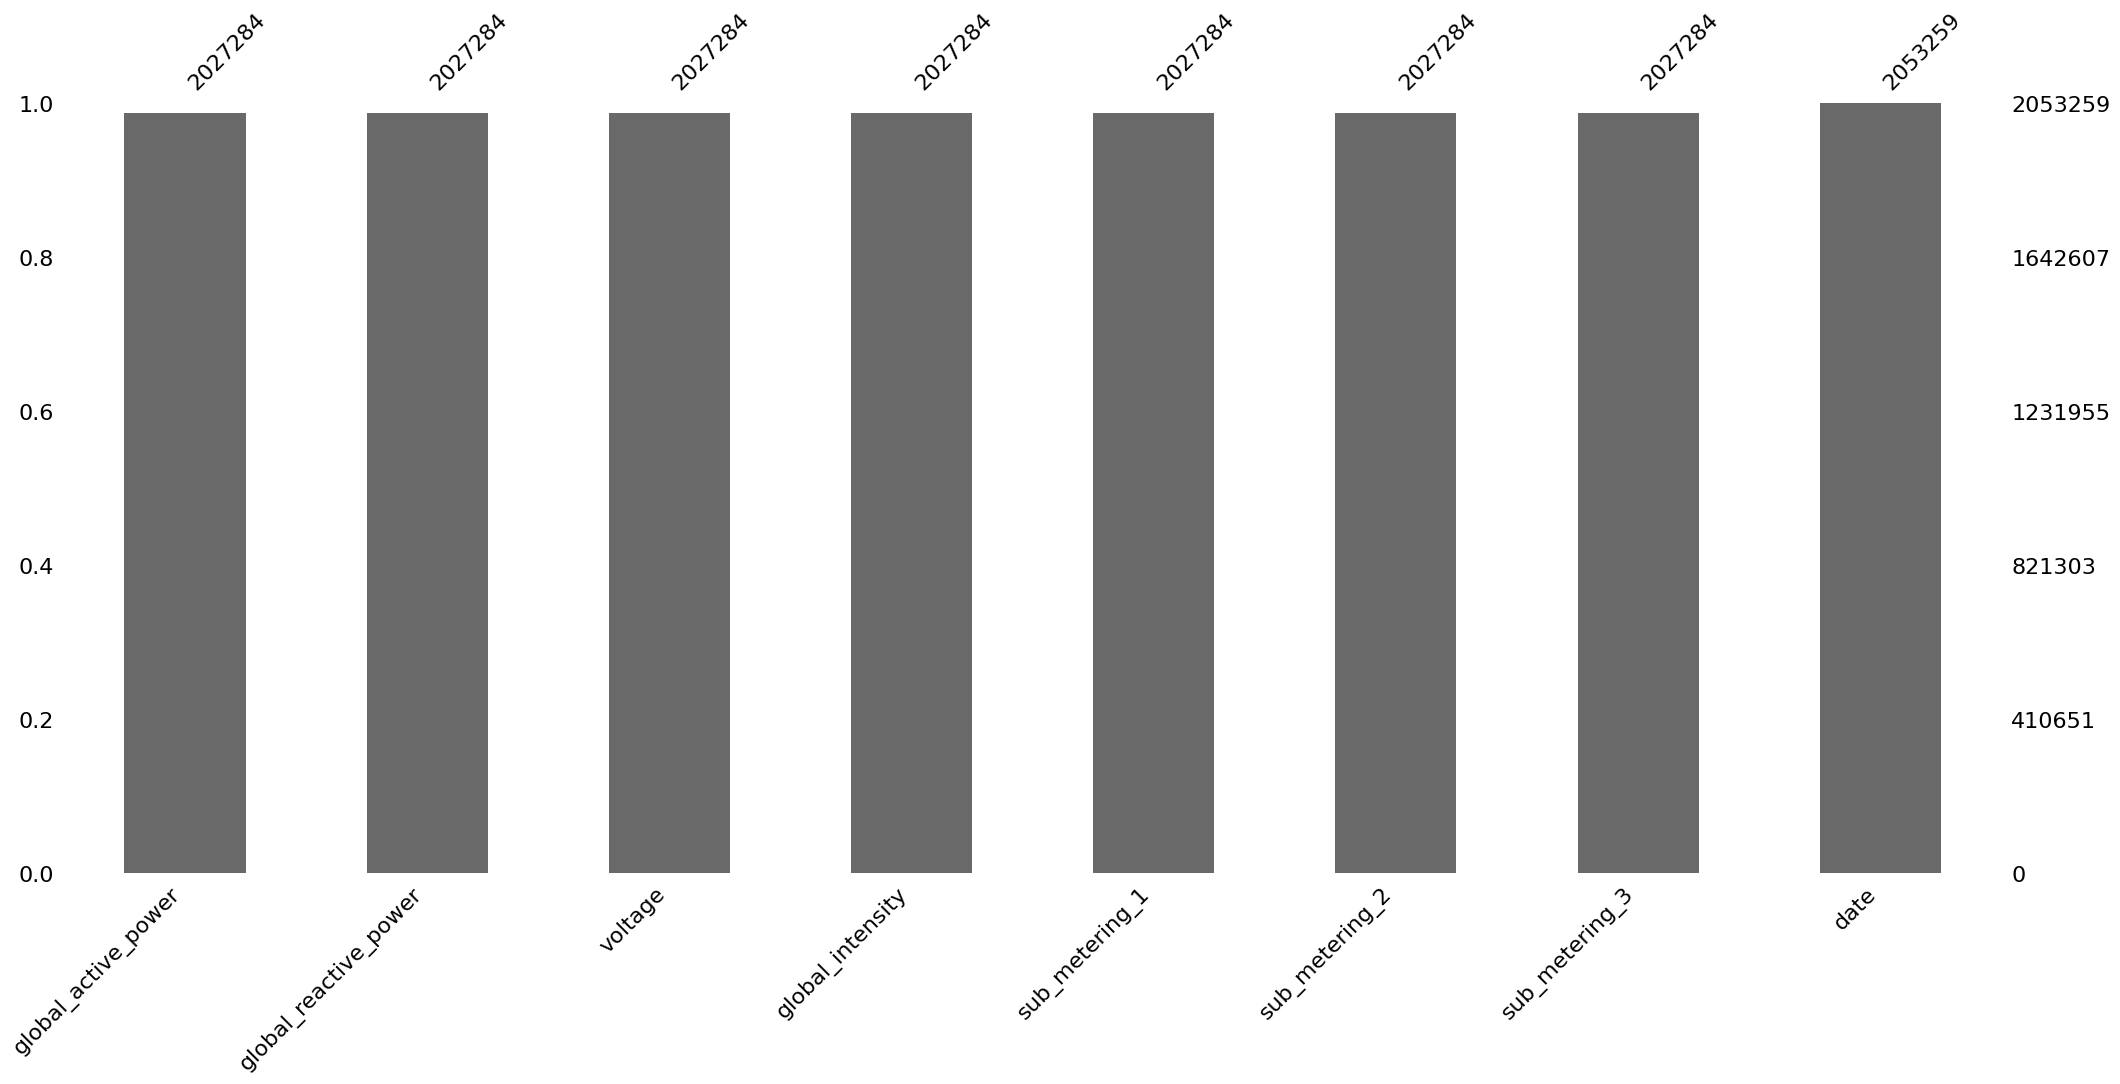

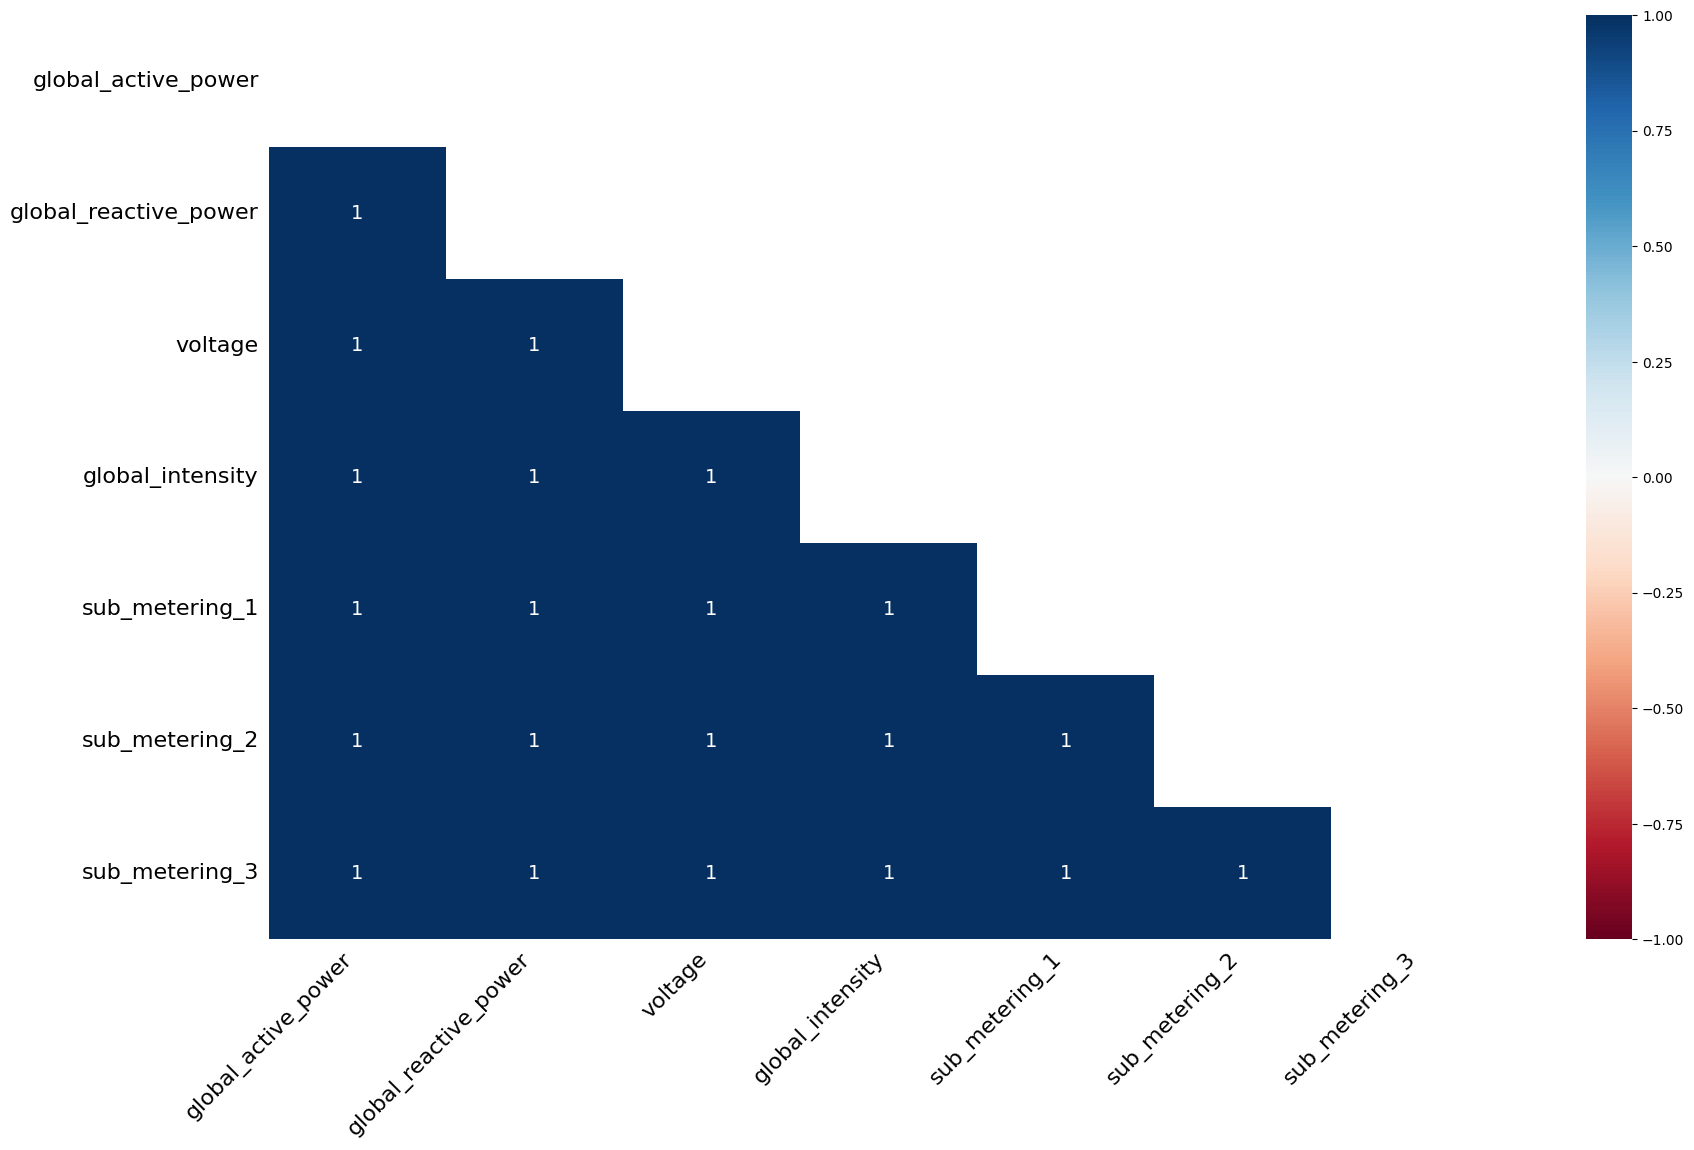

In [8]:
msno.bar(df_household)
msno.heatmap(df_household)

We observe that in the *df_household* dataframe a small percentage of the data is missing and missing values always appear as entire rows. This suggests that we can effectively interpolate missing values.

<Axes: >

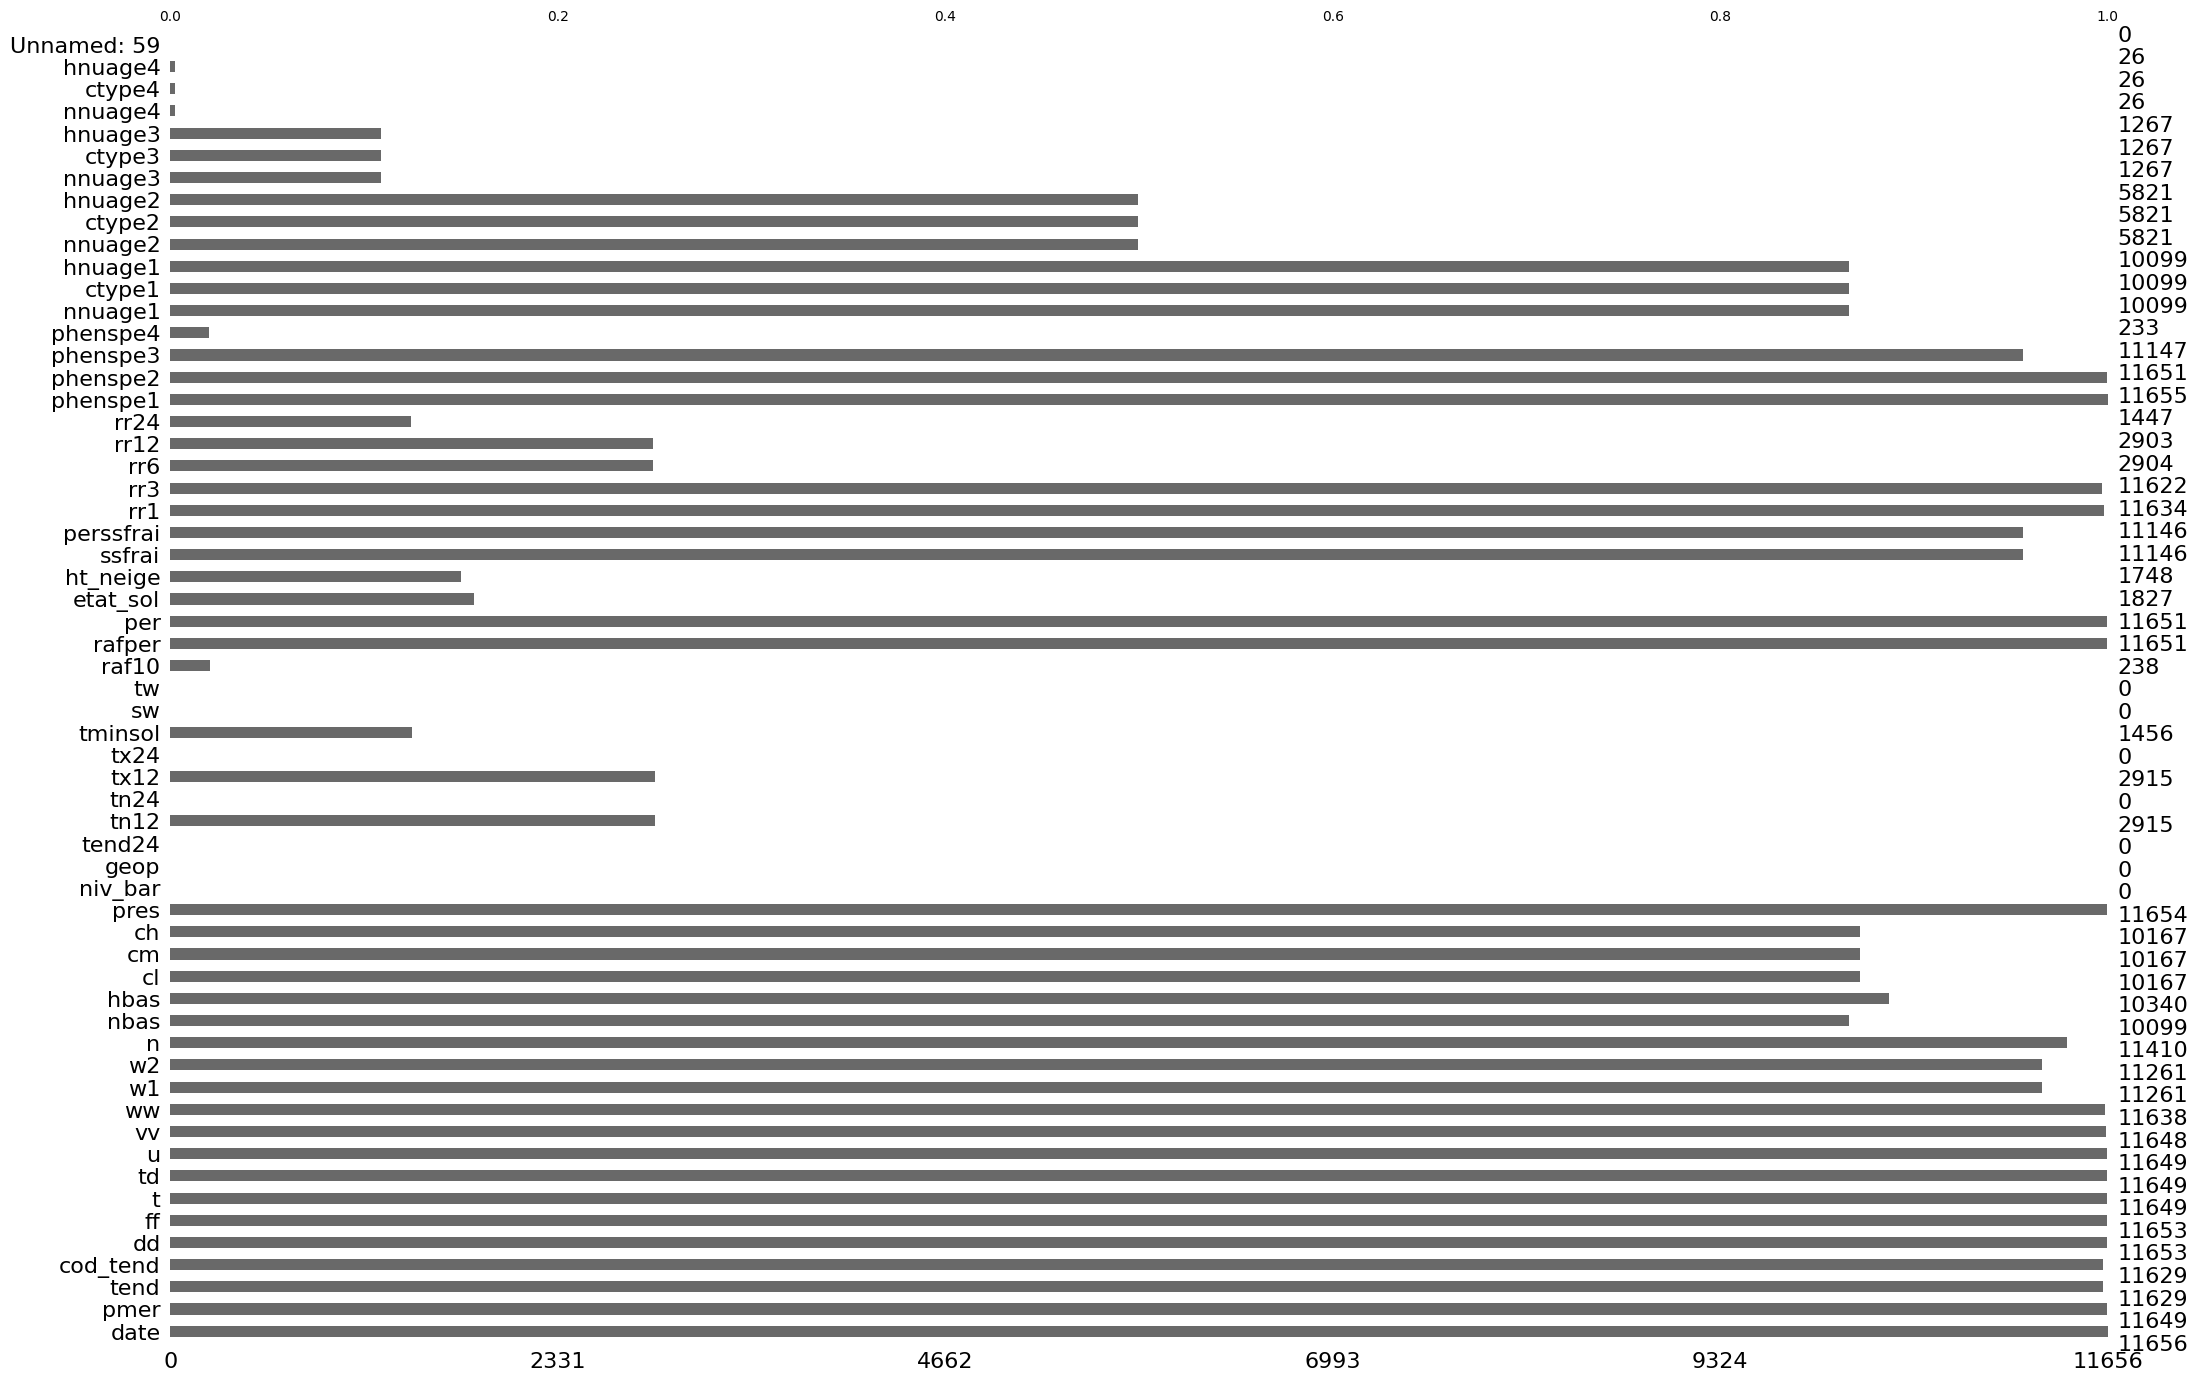

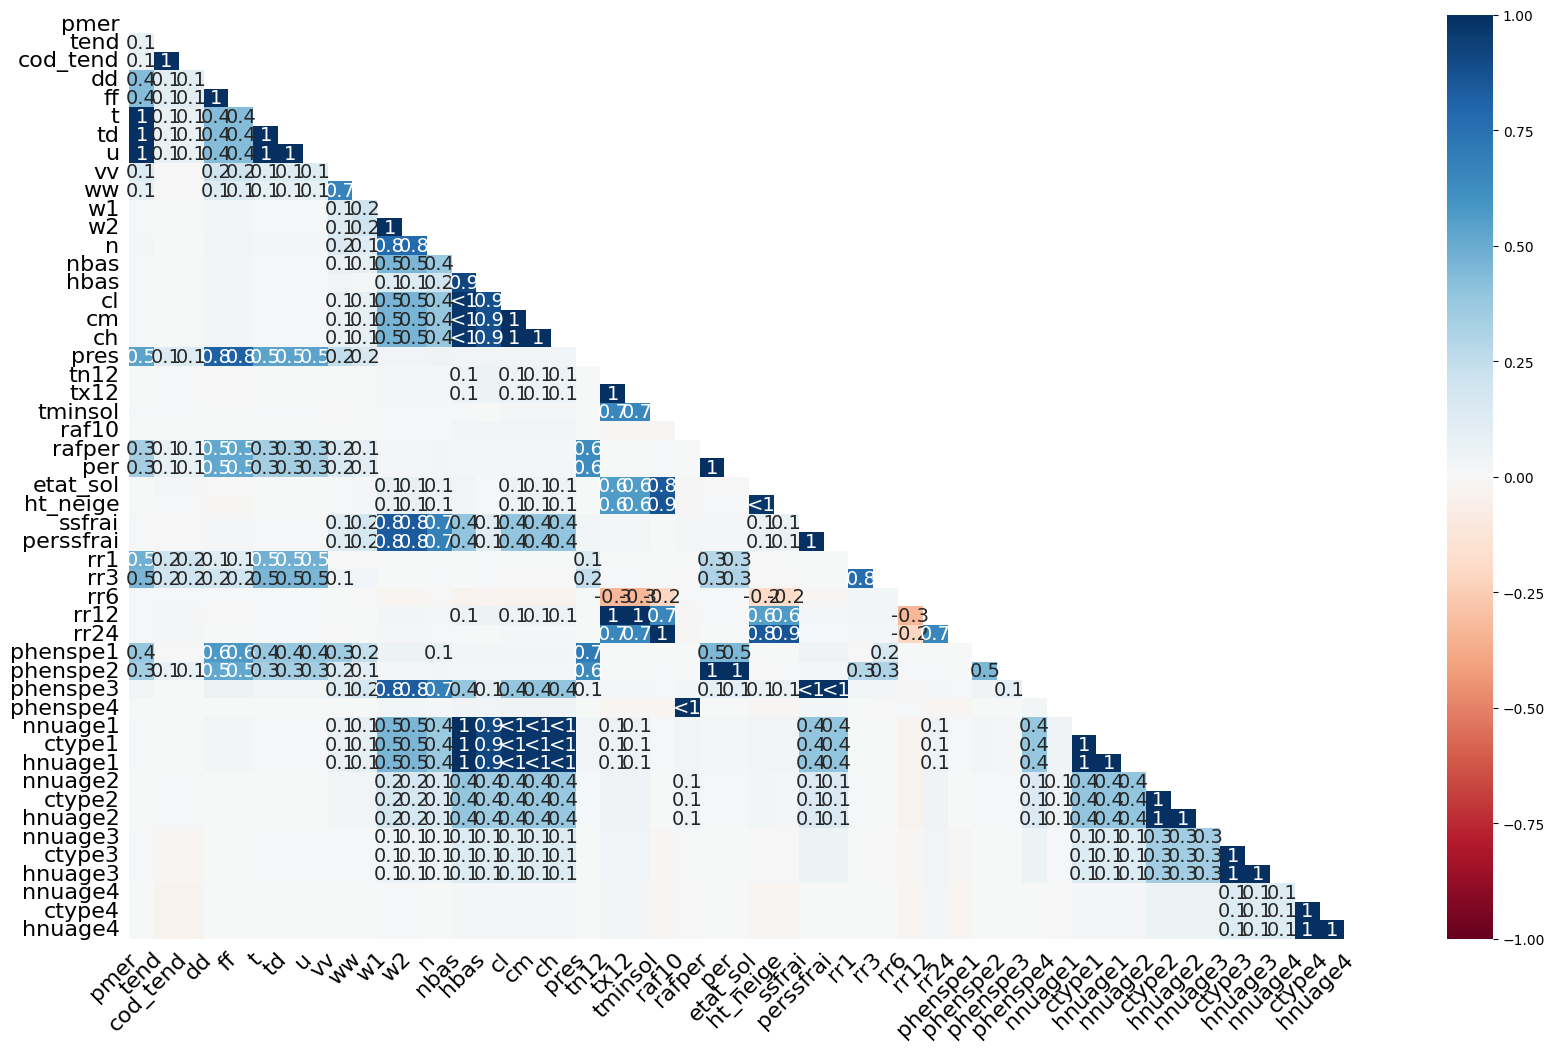

In [9]:
msno.bar(df_station)
msno.heatmap(df_station)

For the *df_station* dataset, the situation is more complicated. We have a bigger amount of missing data and missing values do not always come in blocks as indicated by the heatmap.

<h4 align="center"> <font color='gray'>Interpolating missing data</font></h4> <a class="anchor" id="1.2.2"></a>

We would like to fill rows with missing data in order to keep the structure of our data. Let's use interpolation to fill these missing values.

In [10]:
df_household = df_household.interpolate()
df_station = df_station.interpolate()

<h4 align="center"> <font color='gray'>Winsorizing outliers</font></h4> <a class="anchor" id="1.2.3"></a>

We start with the household dataset. Let's compute the **z-scores** and visualise their distribution using boxplots. 

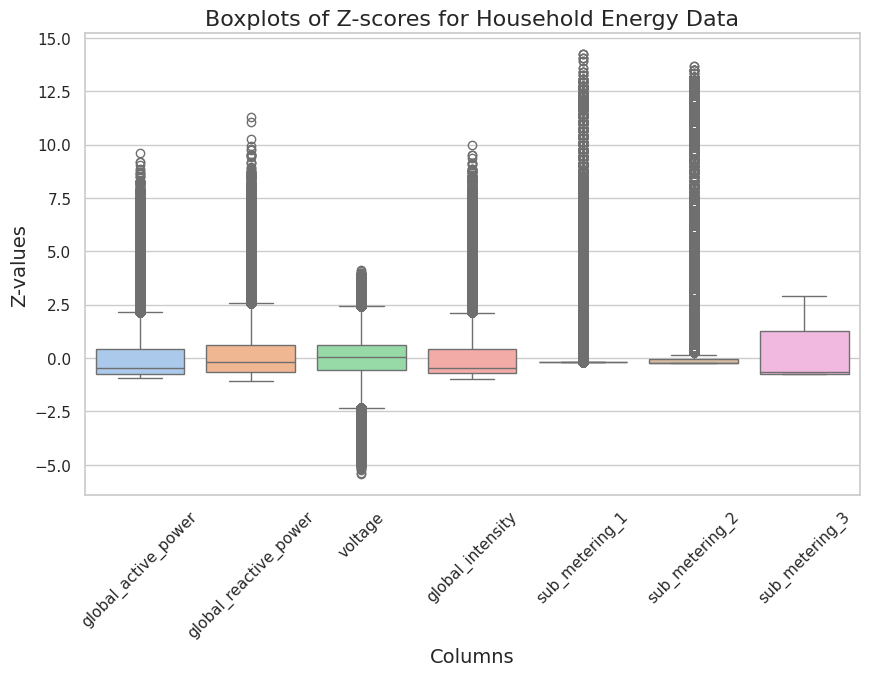

In [11]:
# Calculate Z-scores
z_scores = (df_household[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3']] - df_household[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3']].mean()) / df_household[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3']].std()

# we set the color palette for better visualisation
sns.set(style="whitegrid", palette="pastel")

# we set a convenient figure size
plt.figure(figsize=(10, 6))

# plot boxplots for Z-scores
sns.boxplot(data=z_scores, orient="v")
plt.title('Boxplots of Z-scores for Household Energy Data', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Z-values', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3'], rotation=45)

plt.show()

We observe a large amount of outliers for many of the dataframe's columns. Some outliers are quite extreme and likely represent errors in the sensor data. To eliminate outliers from our dataframe, we use the *winsorization* technique. In other words, we shall fix a z-score threshold and replace values outside this threshold with a maximal/minimal value.

In [12]:
threshold = 0.997

# Replace values exceeding threshold with values at threshold percentile
df_household[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3']] = df_household[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3']].clip(lower=z_scores.quantile(1-threshold), upper=z_scores.quantile(threshold), axis=1)

Now, we repeat this procedure for the weather station data. Since we have a lot of Let's calculate z-scores and plot the boxplots.

<h3 align="center"> <font color='gray'>Merging the two dataframes</font></h3> <a class="anchor" id="1.3"></a>